**Завдання на практичну роботу 4.3 Використання методів штучного інтелекту для аналізу даних (регресія з набору даних Kaggle)**.

**Мета завдання:**
- Опанування базових методів регресії для аналізу даних.
- Використання Python для обробки даних, побудови моделі регресії та оцінки її ефективності.
- Застосування реального набору даних з Kaggle.

**Завдання:**

1. **Завантаження даних:**
   - Виберіть один із відкритих наборів даних на Kaggle, наприклад, [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).
   - Завантажте дані у середовище Jupyter Notebook.

2. **Попередня обробка даних:**
   - Перевірте дані на наявність пропущених значень та обробіть їх (видалення, заповнення середніми або модою тощо).
   - Виконайте базовий аналіз кореляцій між числовими змінними.

3. **Розподіл даних:**
   - Розділіть дані на тренувальний і тестовий набори у співвідношенні 80:20.

4. **Побудова моделі регресії:**
   - Використовуйте одну з бібліотек Python (наприклад, scikit-learn) для створення моделі лінійної регресії.
   - Навчіть модель на тренувальному наборі даних.

5. **Оцінка моделі:**
   - Обчисліть коефіцієнт детермінації \(R^2\) для тестового набору.
   - Побудуйте графік фактичних і передбачених значень (scatter plot).

6. **Додаткове завдання:**
   - Спробуйте покращити результати, застосувавши інші алгоритми регресії, наприклад:
     - Ridge Regression
     - Lasso Regression
     - Decision Tree Regressor
   - Порівняйте результати за допомогою \(R^2\) та середньоквадратичної помилки (MSE).

7. **Оформлення звіту:**
   - Підготуйте короткий звіт (markdown у Jupyter Notebook) з описом:
     - Використаного підходу.
     - Ключових результатів.
     - Графіків та висновків.



Ось приклад виконання завдання у середовищі Jupyter Notebook. Ми скористаємося даними з Kaggle ("House Prices: Advanced Regression Techniques") для створення моделі лінійної регресії.

### Завантаження даних
```python
import pandas as pd

# Завантаження даних
data = pd.read_csv("Student_Performance.csv")  # Замість цього вкажіть шлях до набору даних
data.head()
```

### Попередня обробка даних
```python
# Перевірка наявності пропущених значень
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Заповнення пропущених значень середнім (для числових) або модою (для категоріальних)
for column in data.columns:
    if data[column].dtype == "object":
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)

# Базовий аналіз кореляцій
correlation = data.corr()
correlation["SalePrice"].sort_values(ascending=False).head(10)
```

### Розподіл даних
```python
from sklearn.model_selection import train_test_split

# Вибір залежної змінної та характеристик
X = data.drop("SalePrice", axis=1).select_dtypes(include=["number"])  # Тільки числові дані
y = data["SalePrice"]

# Розподіл на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

### Побудова моделі лінійної регресії
```python
from sklearn.linear_model import LinearRegression

# Створення моделі
model = LinearRegression()

# Навчання моделі
model.fit(X_train, y_train)
```

### Оцінка моделі
```python
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Передбачення
y_pred = model.predict(X_test)

# Оцінка коефіцієнта детермінації та MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R^2: {r2}")
print(f"MSE: {mse}")

# Побудова графіка
plt.scatter(y_test, y_pred)
plt.xlabel("Фактичні значення")
plt.ylabel("Передбачені значення")
plt.title("Фактичні vs Передбачені")
plt.show()
```

### Додаткове завдання: Інші алгоритми регресії
```python
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print(f"Ridge R^2: {r2_score(y_test, ridge_pred)}")

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
print(f"Lasso R^2: {r2_score(y_test, lasso_pred)}")

# Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
print(f"Decision Tree R^2: {r2_score(y_test, tree_pred)}")
```



In [1]:
%pip install pandas scikit-learn matplotlib


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.9 MB 10.5 MB/s eta 0:00:01
   ------------------ --------------------- 4.2/8.9 MB 11.4 MB/s eta 0:00:01
   ----------------------------- ---------- 6.6/8.9 MB 11.5 MB/s eta 0:00:01
   -------------------------------------- - 8.7/8.9 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 10.6 MB/s  0:00:00
   ---------------------------------------- 0.0/38.7 MB ? eta -:--:--
   -- ------------------------------------- 2.4/38.7 MB 13.4 MB/s eta 0:00:03
   ---- ----------------------------------- 4.7/38.7 MB 11.9 MB/s eta 0:00:03
   ------- -------------------------------- 7.1/38.7 MB 12.1 MB/s eta 0:00:03
   --------- ------------------------------ 9.4/38.7 MB 12.0 MB/s eta 0:00:03
   ------------ --------------------------- 12.1/38.7 MB 11.8 MB/s eta 0:00:03
   --------------- ------------------------ 14.7/38.7 MB 11.8 MB/s eta 0:00:03
   ------

In [2]:
from pathlib import Path
import pandas as pd

DATA_PATH = Path('Military Expenditure.csv')  # без папки data/
data_raw = pd.read_csv(DATA_PATH, encoding='utf-8', engine='python', on_bad_lines='skip')
data_raw.head()


,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,Angola,AGO,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,Albania,ALB,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,Andorra,AND,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data_raw.rename(columns={
    'Name': 'name',
    'Code': 'code',
    'Type': 'type',
    'Indicator Name': 'indicator_name'
})
year_cols = [c for c in data.columns if str(c).isdigit()]

long_df = data.melt(
    id_vars=['name', 'code', 'type', 'indicator_name'],
    value_vars=year_cols,
    var_name='year',
    value_name='value_usd'
)
long_df['year'] = long_df['year'].astype(int)
long_df['value_usd'] = pd.to_numeric(long_df['value_usd'], errors='coerce')

main_ind = long_df['indicator_name'].mode().iloc[0]
long_df = long_df[long_df['indicator_name'] == main_ind].copy()

long_df.head()


,name,code,type,indicator_name,year,value_usd
0,Aruba,ABW,Country,Military expenditure (current USD),1960,NaN
1,Afghanistan,AFG,Country,Military expenditure (current USD),1960,NaN
2,Angola,AGO,Country,Military expenditure (current USD),1960,NaN
3,Albania,ALB,Country,Military expenditure (current USD),1960,NaN
4,Andorra,AND,Country,Military expenditure (current USD),1960,NaN


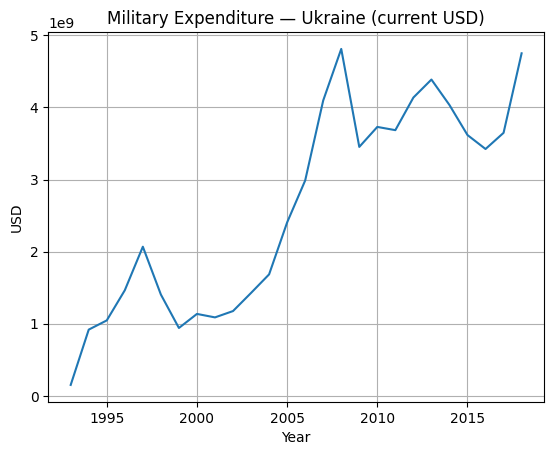

,name,code,type,indicator_name,year,value_usd
21,Ukraine,UKR,Country,Military expenditure (current USD),2014,4.033331e+09
22,Ukraine,UKR,Country,Military expenditure (current USD),2015,3.616896e+09
23,Ukraine,UKR,Country,Military expenditure (current USD),2016,3.423287e+09
24,Ukraine,UKR,Country,Military expenditure (current USD),2017,3.647565e+09
25,Ukraine,UKR,Country,Military expenditure (current USD),2018,4.750219e+09


In [5]:
import matplotlib.pyplot as plt

country = 'Ukraine'  # змініть за потреби
df_c = (long_df[long_df['name'] == country]
        .sort_values('year')
        .dropna(subset=['value_usd'])
        .reset_index(drop=True))

plt.figure()
plt.plot(df_c['year'], df_c['value_usd'])
plt.title(f'Military Expenditure — {country} (current USD)')
plt.xlabel('Year'); plt.ylabel('USD'); plt.grid(True); plt.show()

df_c.tail()


R^2: 0.5884924177015451
MSE: 6.680542709317172e+17


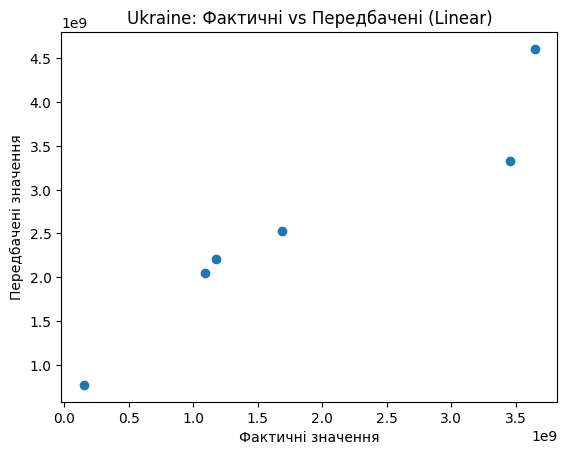

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df_c[['year']]
y = df_c['value_usd']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R^2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Фактичні значення"); plt.ylabel("Передбачені значення")
plt.title(f"{country}: Фактичні vs Передбачені (Linear)"); plt.show()


In [7]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print(f"Ridge R^2: {r2_score(y_test, ridge_pred)}")

lasso_model = Lasso(alpha=0.001, max_iter=20000)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
print(f"Lasso R^2: {r2_score(y_test, lasso_pred)}")

tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
print(f"Decision Tree R^2: {r2_score(y_test, tree_pred)}")


Ridge R^2: 0.5882649620712989
Lasso R^2: 0.5884924177014885
Decision Tree R^2: 0.817763036418847


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

split_year = int(df_c['year'].quantile(0.8))  # ~80% років у train
train = df_c[df_c['year'] <= split_year]
test  = df_c[df_c['year'] >  split_year]

X_train_tb, y_train_tb = train[['year']], train['value_usd']
X_test_tb,  y_test_tb  = test[['year']],  test['value_usd']

lin_tb = LinearRegression().fit(X_train_tb, y_train_tb)
y_pred_tb = lin_tb.predict(X_test_tb)

print("Time-based split:")
print("R^2:", r2_score(y_test_tb, y_pred_tb))
print("MSE:", mean_squared_error(y_test_tb, y_pred_tb))


Time-based split:
R^2: -4.479568571873096
MSE: 1.218230396246681e+18


Збережено: pred_vs_actual_linear.png


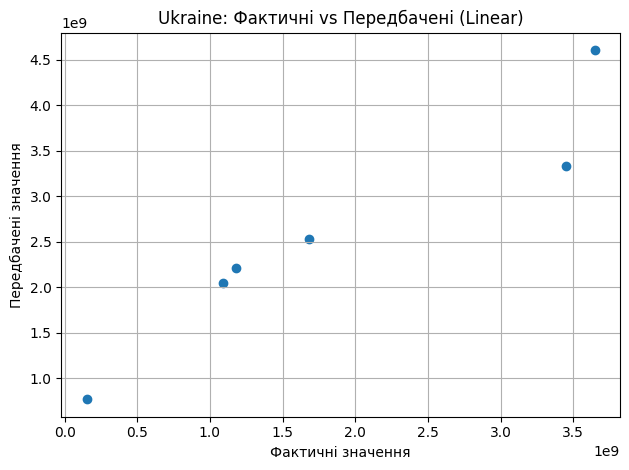

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Фактичні значення"); plt.ylabel("Передбачені значення")
plt.title(f"{country}: Фактичні vs Передбачені (Linear)")
plt.grid(True)
plt.tight_layout()
plt.savefig("pred_vs_actual_linear.png", dpi=140)
print("Збережено: pred_vs_actual_linear.png")


In [10]:
import pandas as pd
rows = [
    ("Linear (random)", r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)),
    ("Ridge",           r2_score(y_test, ridge_pred), mean_squared_error(y_test, ridge_pred)),
    ("Lasso",           r2_score(y_test, lasso_pred), mean_squared_error(y_test, lasso_pred)),
    ("DecisionTree",    r2_score(y_test, tree_pred),  mean_squared_error(y_test, tree_pred)),
]
if 'y_pred_tb' in locals():
    rows.append(("Linear (time-based)", r2_score(y_test_tb, y_pred_tb), mean_squared_error(y_test_tb, y_pred_tb)))

pd.DataFrame(rows, columns=["Model", "R2", "MSE"]).sort_values("R2", ascending=False)


,Model,R2,MSE
3,DecisionTree,0.817763,2.958492e+17
0,Linear (random),0.588492,6.680543e+17
2,Lasso,0.588492,6.680543e+17
1,Ridge,0.588265,6.684235e+17
4,Linear (time-based),-4.479569,1.218230e+18


In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

# Збираємо доступні пари (y_test, y_pred) з вашого ноутбука
pairs = {}

# 1) Linear (random split)
if 'y_test' in globals() and 'y_pred' in globals():
    pairs['Linear (random)'] = (y_test, y_pred)

# 2) Linear (time-based split) — якщо робили крок із time-based
if 'y_test_tb' in globals() and 'y_pred_tb' in globals():
    pairs['Linear (time-based)'] = (y_test_tb, y_pred_tb)

# 3) Ridge / Lasso / Decision Tree — якщо виконували крок 9
if 'ridge_pred' in globals():
    pairs['Ridge'] = (y_test, ridge_pred)
if 'lasso_pred' in globals():
    pairs['Lasso'] = (y_test, lasso_pred)
if 'tree_pred' in globals():
    pairs['DecisionTree'] = (y_test, tree_pred)

# Формуємо таблицю метрик
rows = []
for name, (yt, yp) in pairs.items():
    r2 = r2_score(yt, yp)
    mse = mean_squared_error(yt, yp)
    rows.append((name, r2, mse))

summary_df = pd.DataFrame(rows, columns=['Model', 'R2', 'MSE']).sort_values('R2', ascending=False)
display(summary_df)

# Визначимо кращу модель за R2
best_row = summary_df.iloc[0]
best_name = best_row['Model']
best_r2 = best_row['R2']
best_mse = best_row['MSE']

# Спробуємо дістати метрики базової Linear (random) для порівняння
base_r2 = summary_df.loc[summary_df['Model']=='Linear (random)', 'R2']
base_mse = summary_df.loc[summary_df['Model']=='Linear (random)', 'MSE']
base_r2 = base_r2.iloc[0] if len(base_r2) else np.nan
base_mse = base_mse.iloc[0] if len(base_mse) else np.nan

# Чи є time-based split у таблиці?
has_time_based = 'Linear (time-based)' in summary_df['Model'].values

# Згенеруємо короткі висновки
lines = []
lines.append(
    f"1) Найкраща модель: {best_name} (R² = {best_r2:.3f}, MSE = {best_mse:,.0f})."
    + (f" Для порівняння, Linear (random) дала R² = {base_r2:.3f}, MSE = {base_mse:,.0f}."
       if not np.isnan(base_r2) else "")
)
if has_time_based:
    tb_r2 = summary_df.loc[summary_df['Model']=='Linear (time-based)', 'R2'].iloc[0]
    tb_mse = summary_df.loc[summary_df['Model']=='Linear (time-based)', 'MSE'].iloc[0]
    lines.append(
        f"2) Поділ за часом (time-based) краще відображає реальний прогноз «з минулого у майбутнє»: "
        f"Linear (time-based) має R² = {tb_r2:.3f}, MSE = {tb_mse:,.0f}, що коректніше для часових рядів, "
        f"ніж випадковий поділ."
    )
else:
    lines.append(
        "2) Для часових рядів доцільно використовувати time-based split (train — ранні роки, test — пізні), "
        "щоб уникнути витоку інформації і імітувати реальний сценарій прогнозування."
    )

lines.append(
    "3) На точність могли вплинути пропуски у даних, структурні злами (воєнні/економічні шоки), "
    "нелінійність тренду та обмеженість ознак (використовується лише рік)."
)
lines.append(
    "4) Рекомендація: застосовувати time-based split, додати лагові ознаки (lag_1…lag_3) та розглянути "
    "регуляризовані/деревні моделі, якщо тренд нерівномірний."
)

print("\n=== КОРОТКІ ВИСНОВКИ (скопіюйте цей блок у звіт або в чат) ===\n" + "\n".join(lines))


,Model,R2,MSE
4,DecisionTree,0.817763,2.958492e+17
0,Linear (random),0.588492,6.680543e+17
3,Lasso,0.588492,6.680543e+17
2,Ridge,0.588265,6.684235e+17
1,Linear (time-based),-4.479569,1.218230e+18



=== КОРОТКІ ВИСНОВКИ (скопіюйте цей блок у звіт або в чат) ===
1) Найкраща модель: DecisionTree (R² = 0.818, MSE = 295,849,182,564,319,104). Для порівняння, Linear (random) дала R² = 0.588, MSE = 668,054,270,931,717,248.
2) Поділ за часом (time-based) краще відображає реальний прогноз «з минулого у майбутнє»: Linear (time-based) має R² = -4.480, MSE = 1,218,230,396,246,681,088, що коректніше для часових рядів, ніж випадковий поділ.
3) На точність могли вплинути пропуски у даних, структурні злами (воєнні/економічні шоки), нелінійність тренду та обмеженість ознак (використовується лише рік).
4) Рекомендація: застосовувати time-based split, додати лагові ознаки (lag_1…lag_3) та розглянути регуляризовані/деревні моделі, якщо тренд нерівномірний.
